In [1]:
import numpy as np
import pandas as pd
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_csv.csv to diabetes_csv.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['diabetes_csv.csv']))
df.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df.drop(columns=['class'])
Y = df['class']
le = preprocessing.LabelEncoder()
le.fit(Y)
y = le.transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
feature_names = X.columns
labels = Y.unique()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, Y_train)

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
Y_pred = clf.predict(X_test)
Y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
prob = clf.predict_proba(X_test)
prob

array([[0.08196721, 0.91803279],
       [0.46511628, 0.53488372],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.98181818, 0.01818182],
       [0.08196721, 0.91803279],
       [0.08196721, 0.91803279],
       [0.08196721, 0.91803279],
       [0.46511628, 0.53488372],
       [0.91666667, 0.08333333],
       [0.82051282, 0.17948718],
       [1.        , 0.        ],
       [0.08196721, 0.91803279],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.08196721, 0.91803279],
       [1.        , 0.        ],
       [0.98181818, 0.01818182],
       [0.91666667, 0.08333333],
       [0.5       , 0.5       ],
       [0.91666667, 0.08333333],
       [0.46511628, 0.53488372],
       [0.91666667, 0.08333333],
       [0.91666667, 0.08333333],
       [0.46511628, 0.53488372],
       [0.08196721, 0.91803279],
       [0.08196721, 0.91803279],
       [0.

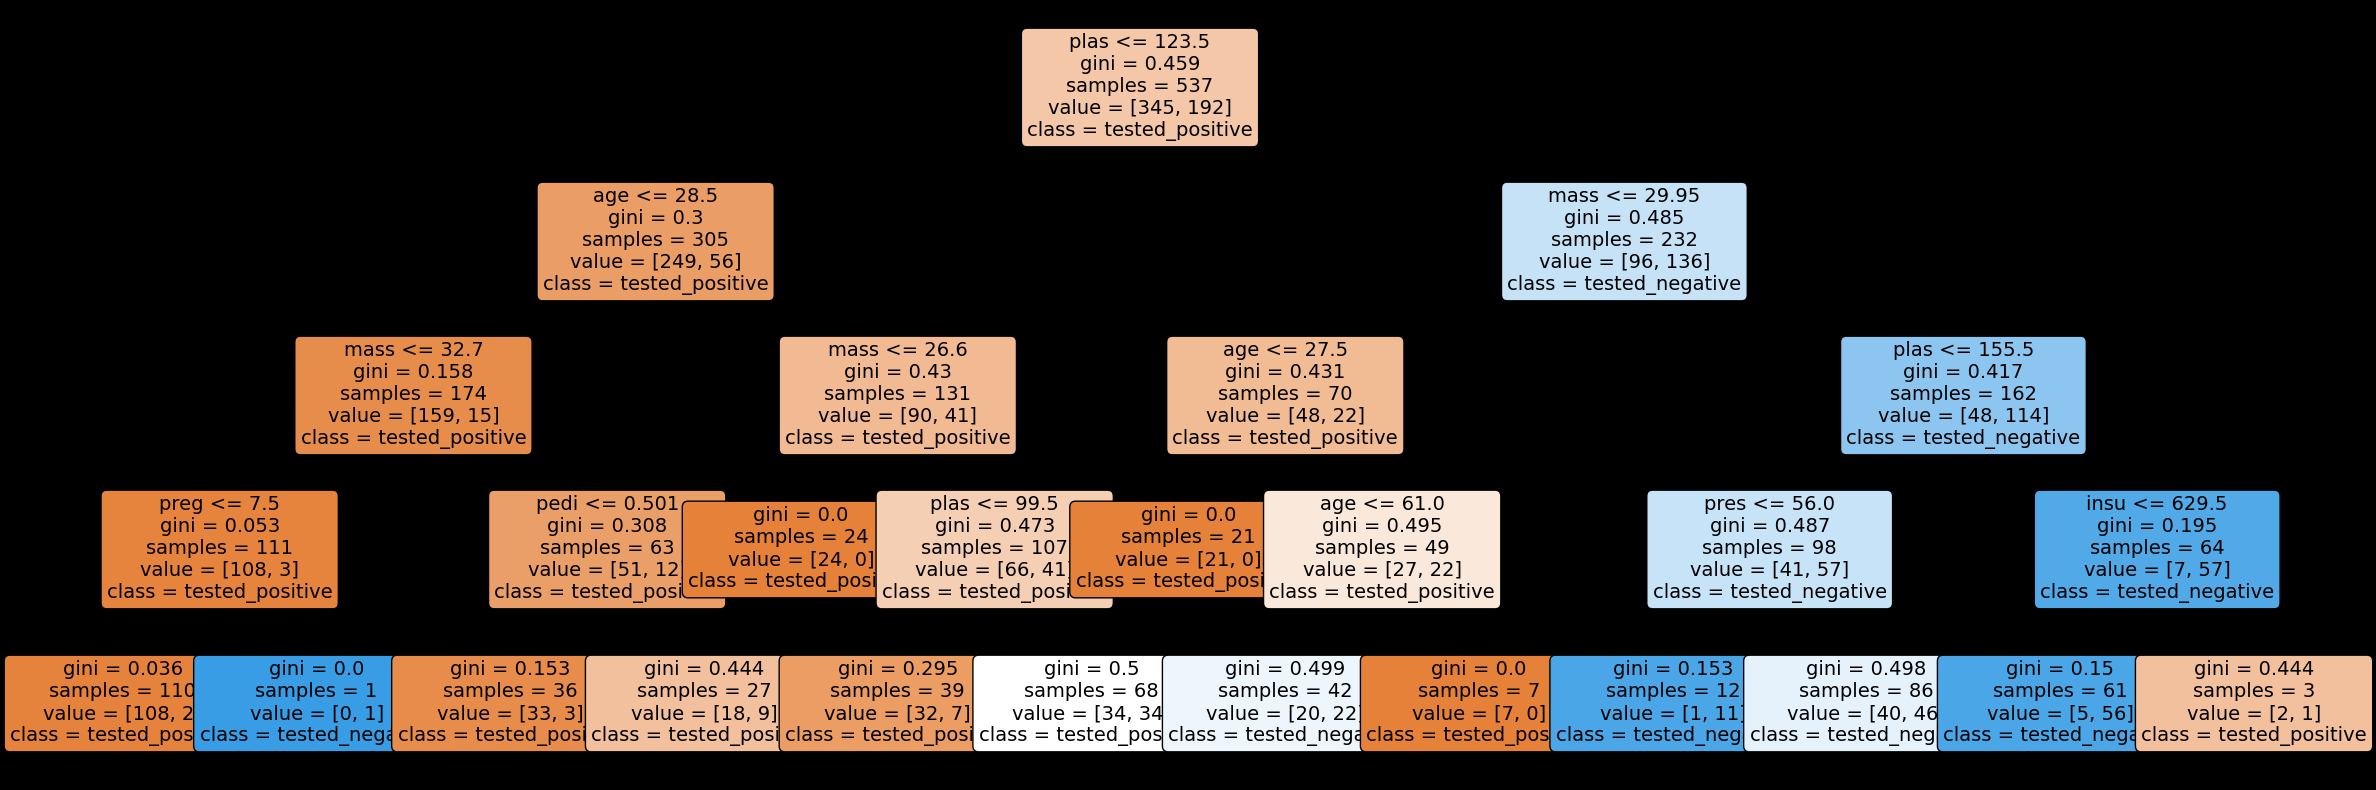

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10), facecolor='k')
a = tree.plot_tree(clf, feature_names=feature_names, class_names=labels, rounded=True, filled=True, fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred, average='macro')
f1_score = 2*(precision*recall)/(precision+recall)
print(precision)
print(recall)
print(f1_score)

0.7840136054421769
0.7799329501915708
0.7819679541863399
